# 🏥 Predictive Health Insurance Model – Phase 1 (MVP)

### 🧠 Project Overview
The **Predictive Health Insurance Model** aims to help **Shield Insurance** estimate individual health insurance premiums based on:
- **Age**
- **Semi-occasional / high-inhibit habits (e.g., smoking, alcohol)**
- **BMI**
- **Medical history**

This project is developed in collaboration with **AtliQ AI** and consists of two main phases:

1. **Phase 1 – MVP Development**  
   Build and deploy a predictive regression model with an interactive Streamlit web app.  
2. **Phase 2 – Infrastructure Development**  
   Establish a straight-through process (STP) for insurance quotes *(to be planned later)*.

---

### 🎯 Phase 1 Objective
- ✅ Develop a **high-accuracy predictive regression model** with at least **95% accuracy**.  
- ✅ Ensure that for **97% of predictions**, the **percentage difference between predicted and actual premium** is **less than 10%**.  
- ✅ Deploy the model in the **cloud**, enabling underwriters to access it securely from anywhere.  
- ✅ Build an **interactive Streamlit application** for real-time premium prediction.

---

### ⚙️ Scope of Work
1. **📊 Data Collection & Preprocessing**
   - Gather and clean labeled health insurance datasets.
   - Handle missing data, outliers, and categorical encodings.
   - Perform exploratory data analysis (EDA) to understand variable relationships.

2. **🤖 Model Development**
   - Train and evaluate multiple regression models (e.g., Linear Regression, Random Forest, XGBoost).
   - Tune hyperparameters to achieve the highest possible accuracy.
   - Select and finalize the best-performing model.

3. **☁️ Model Deployment**
   - Deploy the optimized model on a **cloud platform** (e.g., AWS, Azure, or GCP).
   - Implement proper **API endpoints** for integration with the Streamlit app.
   - Ensure **security, scalability, and low-latency predictions**.

4. **💻 Streamlit Application**
   - Create a **user-friendly interface** for underwriters.
   - Allow users to input customer data and instantly view predicted premiums.
   - Include visualizations, confidence intervals, and logs for transparency.

5. **🧪 Testing & Validation**
   - Conduct rigorous testing using real-world and synthetic data.
   - Validate model performance and reliability under various input scenarios.

6. **📚 Documentation & Training**
   - Provide comprehensive documentation for model usage and API integration.
   - Conduct training sessions for underwriters and stakeholders.

---

### 📦 Deliverables
- 🎯 **Trained & validated regression model**  
- ☁️ **Deployed cloud model with API access**  
- 💻 **Streamlit application for underwriters**  
- 📘 **Documentation and technical report**  
- 🧑‍🏫 **Training materials & usage guide**

---

### ✅ Phase 1 Acceptance Criteria
| Criteria | Description |
|:--|:--|
| 🚀 **Successful Deployment** | Model and Streamlit application deployed and accessible in the cloud |
| 📈 **Accuracy Requirement** | Model achieves ≥ **97% accuracy** |
| 📊 **Prediction Precision** | ≥ **95%** of predictions within **±10%** of actual premiums |
| 👩‍💼 **Application Usability** | Application tested and confirmed **usable by underwriters** |
| 🧾 **Documentation Delivered** | All supporting documentation and training materials completed |

---

### 🗓️ Project Timeline (Phase 1)
| Stage | Duration |
|:--|:--|
| Data Collection & Preprocessing | 2 weeks |
| Model Development & Evaluation | 4 weeks |
| Deployment & App Development | 3 weeks |
| Testing, Validation & Training | 2 weeks |

---

### 👥 Project Team
| Role | Name |
|:--|:--|
| Data Scientist| **Javidan Akbarov** |


---

> 💡 **Note:**  
> This notebook focuses on **Phase 1 (MVP)**, which covers everything from **data preparation** to **model deployment and app integration**.  
> Phase 2 (STP automation) will be planned and executed once the MVP is validated in production.


In [299]:
# Let's start adding important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score

import warnings
warnings.filterwarnings('ignore')

**Let's Load our data to have some insights**

In [300]:
df = pd.read_excel('premiums_rest.xlsx')
df['Genetical_Risk'] = 0
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,Genetical_Risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,0
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,0


In [303]:
df.sample(3)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,Genetical_Risk
15790,45,Female,Southeast,Married,2,Overweight,Occasional,Freelancer,<10L,4,Diabetes & High blood pressure,Bronze,13701,0
3738,32,Male,Northeast,Unmarried,0,Obesity,No Smoking,Freelancer,<10L,4,Heart disease,Silver,23927,0
27431,38,Male,Southeast,Married,4,Overweight,Occasional,Freelancer,25L - 40L,35,No Disease,Silver,16129,0


In [304]:
df.shape

(29904, 14)

--------------------------------------------------------------------------------
### First of all, let's start by treating our column names. Right they contain `white spaces` amd their `letter-case` si kinda bothering. For example - `Medical History` - `medical-history`. We are going to make it `snake-case` and better reading.

In [305]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [306]:
df.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,0
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,0


<h2 align="center" style="color:blue">Exploratory Data Analysis & Data Cleaning</h2>

In [307]:
df.shape

(29904, 14)

**Handling the missing values**

In [308]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           9
employment_status        1
income_level             9
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [309]:
df.dropna(inplace=True)
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [310]:
# Let's check for duplicates and even though they dont exist we will treat them so we wont have any surprise if new data comes.
df.duplicated().sum()

np.int64(0)

In [311]:
# Handling duplicates anyways
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [312]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29886.000000,29886.000000,29886.000000,29886.000000,29886.0
mean,43.396105,2.379910,23.364184,20892.303821,0.0
std,13.412657,1.431201,24.740339,6936.813440,0.0
min,26.000000,-3.000000,1.000000,3625.000000,0.0
25%,34.000000,1.000000,7.000000,15697.250000,0.0
50%,42.000000,3.000000,17.000000,20489.000000,0.0
75%,52.000000,3.000000,32.000000,26360.000000,0.0
max,356.000000,5.000000,930.000000,43471.000000,0.0


**Let do some data cleaning: number_of_dependants sicne it has negative values.**

In [313]:
df.number_of_dependants.value_counts()

number_of_dependants
 3    9492
 2    6187
 4    4723
 0    4572
 1    3209
 5    1653
-1      30
-3      20
Name: count, dtype: int64

In [314]:
df.number_of_dependants.unique()

array([ 0,  2,  3,  4,  1,  5, -1, -3])

In [315]:
df[df.number_of_dependants < 0]

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
1805,34,Female,Southeast,Married,-1,Underweight,Regular,Self-Employed,25L - 40L,35,High blood pressure & Heart disease,Silver,22995,0
2273,41,Male,Southwest,Married,-1,Obesity,Regular,Salaried,10L - 25L,21,Diabetes,Silver,22766,0
3513,56,Male,Southwest,Married,-3,Normal,Occasional,Salaried,10L - 25L,16,Thyroid,Bronze,11979,0
3904,26,Male,Southeast,Married,-1,Obesity,Occasional,Freelancer,25L - 40L,27,No Disease,Silver,18269,0
4900,37,Male,Northwest,Married,-1,Overweight,Regular,Self-Employed,<10L,8,Diabetes,Bronze,13664,0
5917,42,Female,Southeast,Unmarried,-3,Overweight,Regular,Self-Employed,<10L,8,Diabetes & Heart disease,Bronze,17779,0
7095,50,Female,Northwest,Married,-3,Normal,Occasional,Salaried,<10L,4,Diabetes & High blood pressure,Silver,21957,0
7222,47,Male,Northwest,Unmarried,-3,Overweight,Occasional,Self-Employed,10L - 25L,19,No Disease,Gold,27457,0
7551,39,Male,Southwest,Unmarried,-1,Overweight,Occasional,Self-Employed,25L - 40L,40,High blood pressure,Silver,18406,0
9047,47,Male,Northwest,Married,-1,Overweight,Occasional,Self-Employed,25L - 40L,27,High blood pressure,Gold,29812,0


## 🛠 Fixing Negative Values in `number_of_dependants`

Since there are **no missing values** in our `number_of_dependants` column, there’s no need to toss any rows in the trash 🗑 — dropping isn’t the move here.  

Instead, let’s be practical:  
📞 We could talk to the **business owner** or **data collector** to figure out what went wrong.  

But here’s our working assumption:  
⚠️ There was a **data entry mistake** and some values accidentally went **negative**.  

💡 Instead of deleting them, we’ll **keep them** — just **flip** the sign to make them positive ➕.  

In [316]:
df.number_of_dependants = df.number_of_dependants.abs()

In [317]:
df[df.number_of_dependants < 0]

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk


In [318]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29886.000000,29886.000000,29886.000000,29886.000000,29886.0
mean,43.396105,2.385933,23.364184,20892.303821,0.0
std,13.412657,1.421137,24.740339,6936.813440,0.0
min,26.000000,0.000000,1.000000,3625.000000,0.0
25%,34.000000,1.000000,7.000000,15697.250000,0.0
50%,42.000000,3.000000,17.000000,20489.000000,0.0
75%,52.000000,3.000000,32.000000,26360.000000,0.0
max,356.000000,5.000000,930.000000,43471.000000,0.0


## 🔍 Let’s mess around with the other numeric columns  

First, I’m gonna grab all the numeric values and check their distributions 📊.  
The goal? See the **spread**, spot any **outliers 🚨**, get a feel for the **range**, and whatever other quirks pop up.  


In [319]:
numeric_columns = df.select_dtypes(include='number').columns
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

In [320]:
df.dtypes

age                       int64
gender                   object
region                   object
marital_status           object
number_of_dependants      int64
bmi_category             object
smoking_status           object
employment_status        object
income_level             object
income_lakhs              int64
medical_history          object
insurance_plan           object
annual_premium_amount     int64
genetical_risk            int64
dtype: object

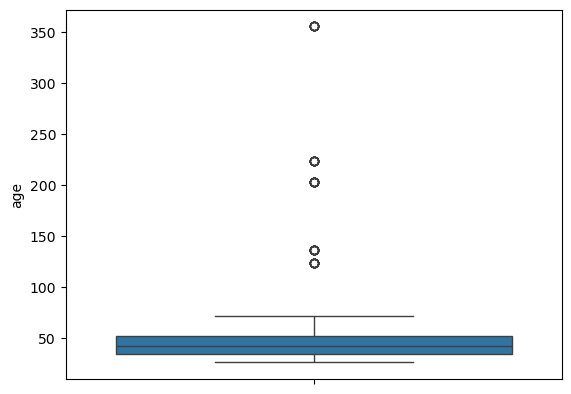

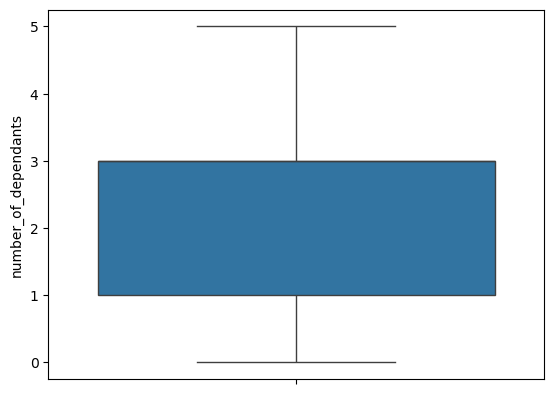

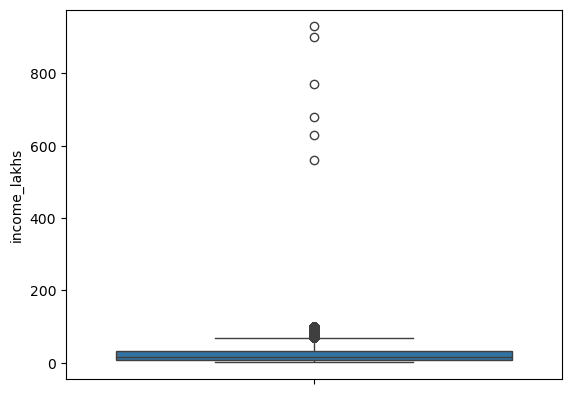

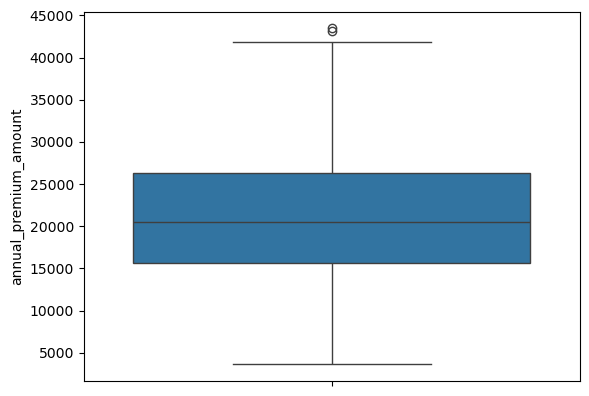

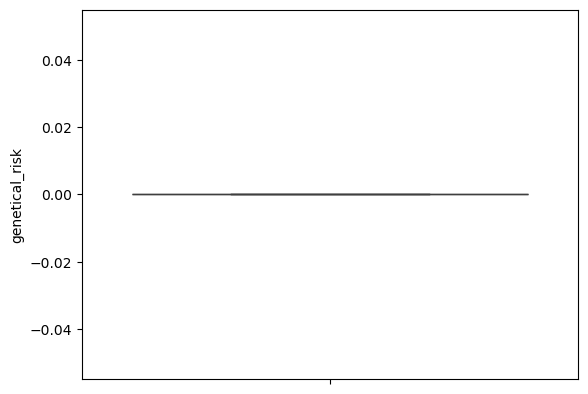

In [321]:
# I wanna draw boxplot(since it is the best for outliers)
for col in numeric_columns:
  sns.boxplot(df[col])
  plt.show()

## 📊 Outlier Notes from the Plots

- **🧓 Age** — Has some *unbelievable* outliers. Like, numbers that make you go *"there’s no way this is real"*.
- **👨‍👩‍👧 Number of Dependents** — Clean. No visible outliers at all.
- **💰 Income (Lakhs)** — Loaded with outliers. Plenty of extreme values here.
- **🎯 Annual Premium Amount (Target)** — A few outliers exist. Since this is the **target column**, we’ll think carefully about whether to treat them or not.


In [322]:
# Let's treat outliers of Age columns

# We are going to use the age of 100 as the baseline
df[df.age > 100].age.value_counts()

age
136    15
203    13
124    11
224    10
356     9
Name: count, dtype: int64

In [323]:
# Let's have new dataframe without the values more than 100. We will store them in a new dataframe called `df_1`
df_1 = df[df.age <= 100]
df_1.age.describe()

count    29828.000000
mean        43.095380
std         11.041991
min         26.000000
25%         34.000000
50%         42.000000
75%         52.000000
max         72.000000
Name: age, dtype: float64

In [324]:
# Let's treat outliers of Income column
df.income_lakhs.describe()

count    29886.000000
mean        23.364184
std         24.740339
min          1.000000
25%          7.000000
50%         17.000000
75%         32.000000
max        930.000000
Name: income_lakhs, dtype: float64

In [325]:
# Let's calculate the iqr bounds in order to define the outliers
def get_iqr_bounds(col):
  Q1, Q3 = col.quantile([0.25, 0.75])
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
  return lower_bound, upper_bound


lower, upper = get_iqr_bounds(df_1.income_lakhs)
lower, upper

(-30.5, 69.5)

In [326]:
df_1[df_1.income_lakhs > upper].shape

(2090, 14)

In [327]:
quantile_threshold_after_discussion = df_1.income_lakhs.quantile(0.999) # the value we put between parathnesis is the value that controls the max and min values of income_lakhs. if we use 1 we gon get the max value which is 930 and if we use 0 we gon get the 1 as the min value for income_lakhs. use describe() method on income_lakhs and investiage
quantile_threshold_after_discussion

np.float64(100.0)

In [328]:
df_1[df_1.income_lakhs > quantile_threshold_after_discussion].shape

(6, 14)

In [329]:
df_2 = df_1[df_1.income_lakhs <= quantile_threshold_after_discussion].copy()
df_2.shape

(29822, 14)

In [330]:
df_2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29822.000000,29822.000000,29822.000000,29822.000000,29822.0
mean,43.094896,2.387734,23.226343,20900.689223,0.0
std,11.042430,1.420644,22.455408,6928.192115,0.0
min,26.000000,0.000000,1.000000,6538.000000,0.0
25%,34.000000,1.000000,7.000000,15705.250000,0.0
50%,42.000000,3.000000,17.000000,20495.500000,0.0
75%,52.000000,3.000000,32.000000,26360.000000,0.0
max,72.000000,5.000000,100.000000,43471.000000,0.0


## 💸 Handling Outliers in `income_lakhs`

When we were dealing with outliers, we hit a wall on the **`income_lakhs`** column.  
The **IQR** method told us the upper bound was **67.000000 lakhs** (≈ $80,000/year).  

But here’s the problem:  
- In reality, annual incomes can easily be **more than $80k** for many people.
- If we blindly used 67 lakhs as the cutoff, we’d be throwing out **~4,000 rows** — people with perfectly normal annual salaries.

After some domain thinking 🤔 and a chat with the business folks 🗣️, we decided to set the upper bound to **100.000000 lakhs** (≈ $120,000/year).  

**Result:**  
✅ Row loss went from **~4,000** to just **10** — and those 10 were clearly extreme cases.  


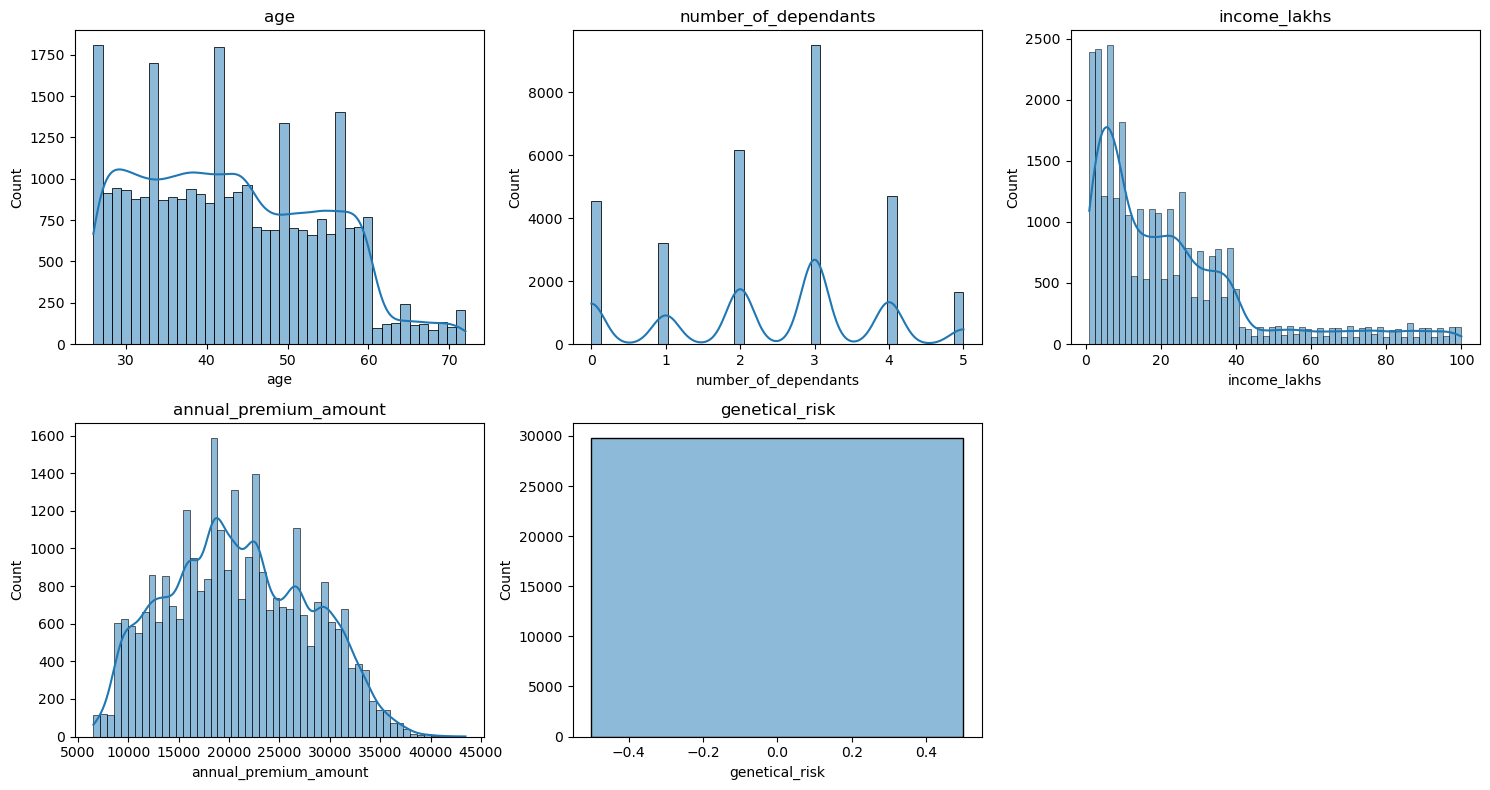

In [331]:
# let's plot all numeric values and do univariate analysis after cleaning our dataset. Cleaned dataset is df_2. We're going use histplot for observing distribution
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))  # Changed to 2x3 grid

for i, column in enumerate(numeric_columns):
    ax = axs[i//3, i%3]  # Determines the position of the subplot in the 2x3 grid
    sns.histplot(df_2[column], kde=True, ax=ax)
    ax.set_title(column)

# Hide the extra subplot (6th position) since you only have 5 columns
fig.delaxes(axs[1, 2])

plt.tight_layout()
plt.show()

In [231]:
df_2.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0


### Bivariate Analysis: Numeric Columns

In [232]:
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

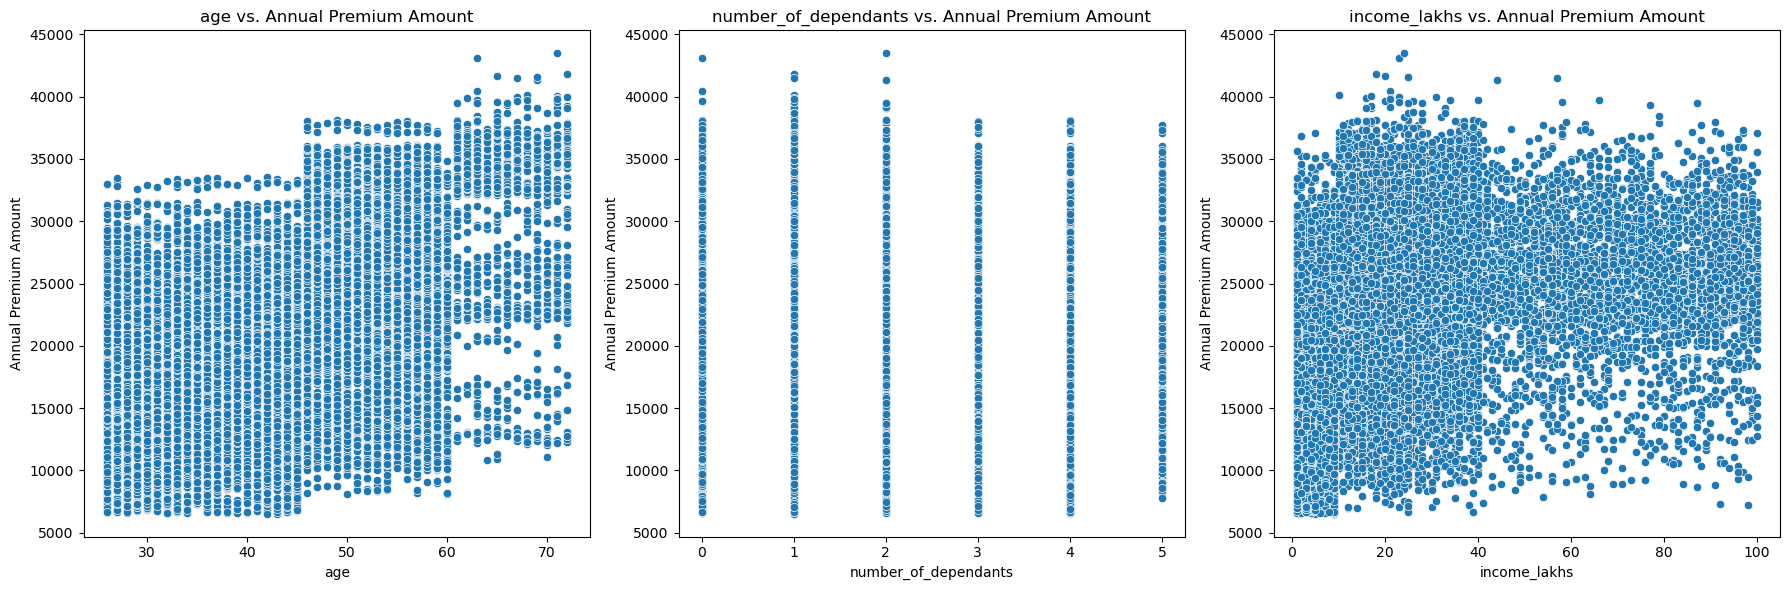

In [233]:
numeric_features = ['age', 'number_of_dependants', 'income_lakhs']

fig, axes = plt.subplots(1, len(numeric_features), figsize=(18, 6))  # Adjust figure size as necessary

for ax, column in zip(axes, numeric_features):
    sns.scatterplot(x=df_2[column], y=df_2['annual_premium_amount'], ax=ax)
    ax.set_title(f'{column} vs. Annual Premium Amount')
    ax.set_xlabel(column)
    ax.set_ylabel('Annual Premium Amount')

plt.tight_layout()  # Adjust layout
plt.show()

## 2. Categorical Columns

In [234]:
categorical_columns = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status', 'income_level', 'medical_history', 'insurance_plan']

for col in categorical_columns:
  print(f'{col}: {df_2[col].unique()}')

gender: ['Male' 'Female']
region: ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status: ['Unmarried' 'Married']
bmi_category: ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status: ['No Smoking' 'Regular' 'Occasional' 'Does Not Smoke' 'Not Smoking'
 'Smoking=0']
employment_status: ['Salaried' 'Self-Employed' 'Freelancer']
income_level: ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history: ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan: ['Bronze' 'Silver' 'Gold']


In [235]:
df_2['smoking_status'].replace({
    'Not Smoking': 'No Smoking',
    'Does Not Smoke': 'No Smoking',
    'Smoking=0': 'No Smoking'
}, inplace=True)

df_2['smoking_status'].unique()

array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

### Univariate Analysis

In [236]:
df_2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,0
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,0


In [237]:
pct_count = df_2.gender.value_counts(normalize=True)*100
pct_count

gender
Male      54.912481
Female    45.087519
Name: proportion, dtype: float64

<Axes: xlabel='gender'>

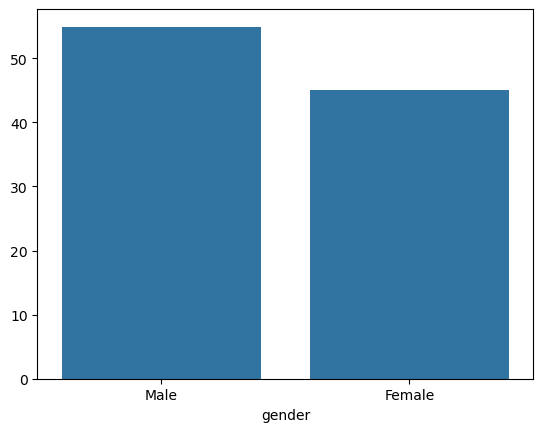

In [238]:
sns.barplot(x=pct_count.index, y=pct_count.values)

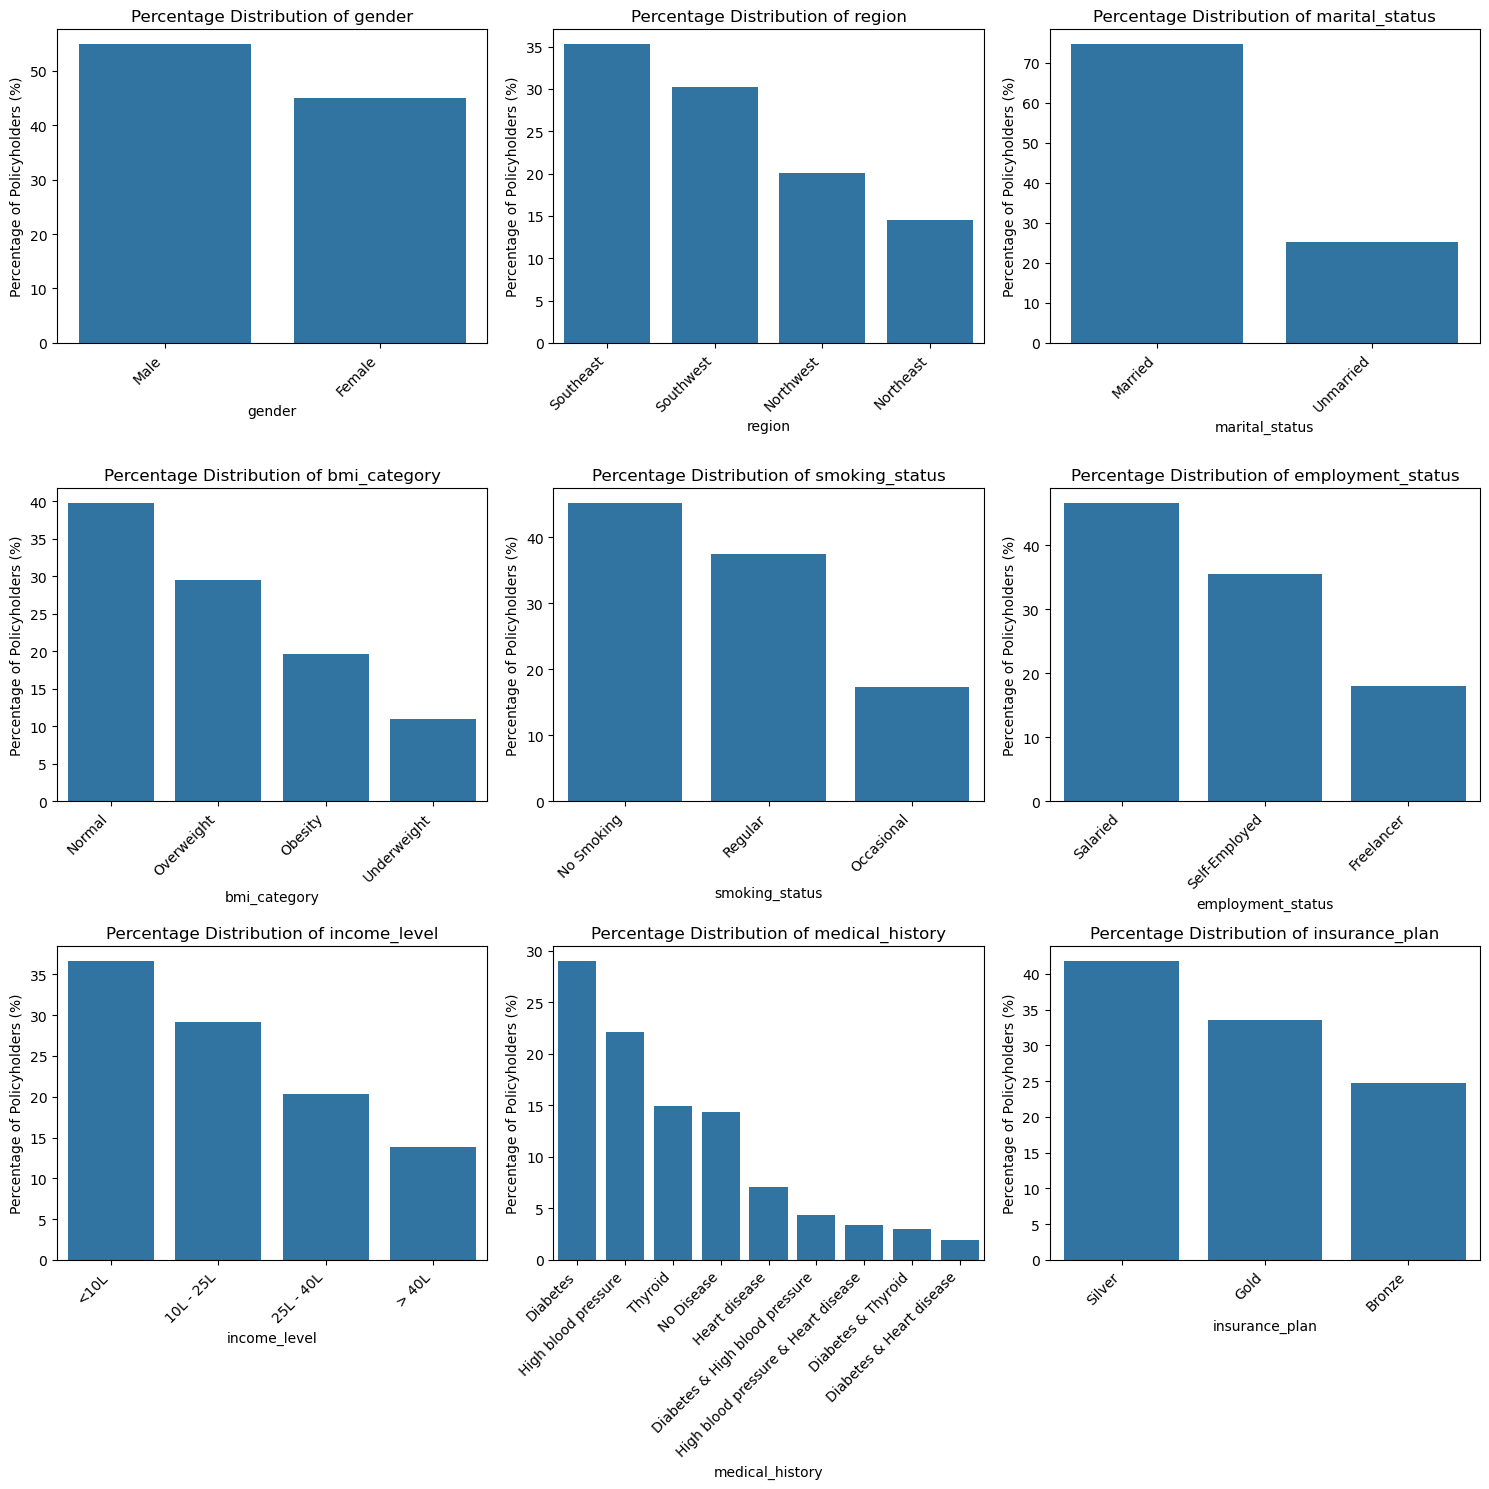

In [239]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for ax, column in zip(axes, categorical_columns):
    category_counts = df_2[column].value_counts(normalize=True) * 100

    sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax)
    ax.set_title(f'Percentage Distribution of {column}')
    ax.set_ylabel('Percentage of Policyholders (%)')
    ax.set_xlabel(column)

    # Rotate and align x-axis labels
    ax.tick_params(axis='x', rotation=45)  # rotate labels 45 degrees
    ax.set_xticklabels(ax.get_xticklabels(), ha='right')  # align to the right so they don't overlap

plt.tight_layout()
plt.show()


### Bivariate Analysis

insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L          799  3554    4354
25L - 40L          301  2631    3142
<10L              6054   527    4341
> 40L              214  3287     618


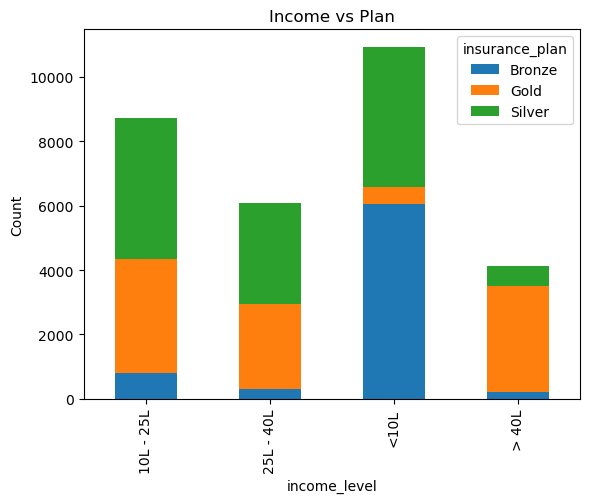

In [240]:
# Cross-tabulation of income_level and insurance_plan
cross_tab = pd.crosstab(df_2['income_level'], df_2['insurance_plan'])
print(cross_tab)

# Plotting the crosstab
cross_tab.plot(kind='bar', stacked=True)
plt.title('Income vs Plan')
plt.ylabel('Count')
plt.show()

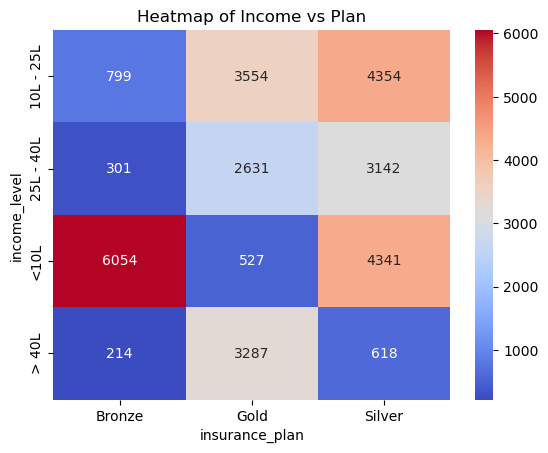

In [241]:
sns.heatmap(cross_tab, annot=True, cmap='coolwarm',fmt="d")
plt.title('Heatmap of Income vs Plan')
plt.show()

<h2 align="center" style="color:blue">Feature Engineering</h2>

In [242]:
df_2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,0
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,0


In [243]:
df_2.medical_history.sample(5)

21959          Heart disease
22836    High blood pressure
11810             No Disease
1135                 Thyroid
17205    High blood pressure
Name: medical_history, dtype: object

In [244]:
# Let's assume we are given the `risk_scores` so we can replace medical_history values with them

risk_scores = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none":0
}

df_2[['disease1', 'disease2']] = df_2['medical_history'].str.split(' & ', expand=True).apply(lambda x: x.str.lower())
df_2['disease1'].fillna('none', inplace=True)
df_2['disease2'].fillna('none', inplace=True)
df_2['total_risk_score'] = 0

for disease in ['disease1', 'disease2']:
  df_2['total_risk_score'] += df_2[disease].map(risk_scores)



# Normalize the risk score to a range of 0 to 1
max_score = df_2['total_risk_score'].max()
min_score = df_2['total_risk_score'].min()

df_2['normalized_risk_score'] = (df_2['total_risk_score'] - min_score) / (max_score - min_score)

In [245]:
df_2.sample(30)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
25603,56,Male,Northeast,Married,3,Normal,No Smoking,Salaried,10L - 25L,15,High blood pressure & Heart disease,Gold,30587,0,high blood pressure,heart disease,14,1.000000
7244,40,Female,Southeast,Married,3,Normal,Occasional,Self-Employed,10L - 25L,24,Diabetes & High blood pressure,Silver,18295,0,diabetes,high blood pressure,12,0.857143
28252,33,Female,Southeast,Married,2,Obesity,Regular,Freelancer,10L - 25L,20,High blood pressure & Heart disease,Silver,26592,0,high blood pressure,heart disease,14,1.000000
15786,46,Female,Southwest,Unmarried,2,Normal,No Smoking,Self-Employed,> 40L,98,High blood pressure,Gold,26468,0,high blood pressure,none,6,0.428571
25659,44,Male,Northwest,Unmarried,0,Normal,Regular,Salaried,<10L,4,Diabetes,Bronze,12135,0,diabetes,none,6,0.428571
12534,29,Female,Northwest,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,16,Diabetes,Gold,21660,0,diabetes,none,6,0.428571
3736,63,Female,Southwest,Married,1,Normal,No Smoking,Self-Employed,10L - 25L,13,Diabetes,Gold,32955,0,diabetes,none,6,0.428571
867,54,Male,Northwest,Married,4,Overweight,Regular,Self-Employed,10L - 25L,21,Diabetes,Gold,31955,0,diabetes,none,6,0.428571
17131,56,Female,Southwest,Unmarried,0,Normal,Occasional,Freelancer,> 40L,77,High blood pressure,Bronze,11128,0,high blood pressure,none,6,0.428571
18871,44,Male,Northeast,Married,3,Underweight,Regular,Salaried,10L - 25L,22,No Disease,Silver,17412,0,no disease,none,0,0.000000


### Encode Text Columns

In [246]:
df_2['insurance_plan'] = df_2['insurance_plan'].map({
    'Bronze': 1,
    'Silver': 2,
    'Gold': 3
})

In [247]:
df_2.income_level.unique()

array(['<10L', '10L - 25L', '> 40L', '25L - 40L'], dtype=object)

In [248]:
df_2['income_level'] = df_2['income_level'].map({'<10L':1, '10L - 25L': 2, '25L - 40L':3, '> 40L':4})

In [249]:
nominal_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status']
df_3 = pd.get_dummies(df_2, columns=nominal_cols, drop_first=True, dtype=int)
df_3.head(5)

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,Diabetes,1,9053,0,diabetes,none,...,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,Diabetes,1,16339,0,diabetes,none,...,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,High blood pressure,2,18164,0,high blood pressure,none,...,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,No Disease,3,20303,0,no disease,none,...,1,0,0,0,0,0,0,0,1,0
4,56,3,2,14,Diabetes,1,15610,0,diabetes,none,...,0,0,0,1,0,0,1,0,0,1


In [250]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29822 entries, 0 to 29903
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              29822 non-null  int64  
 1   number_of_dependants             29822 non-null  int64  
 2   income_level                     29822 non-null  int64  
 3   income_lakhs                     29822 non-null  int64  
 4   medical_history                  29822 non-null  object 
 5   insurance_plan                   29822 non-null  int64  
 6   annual_premium_amount            29822 non-null  int64  
 7   genetical_risk                   29822 non-null  int64  
 8   disease1                         29822 non-null  object 
 9   disease2                         29822 non-null  object 
 10  total_risk_score                 29822 non-null  int64  
 11  normalized_risk_score            29822 non-null  float64
 12  gender_Male            

### Feature Selection

In [251]:
df_3.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,total_risk_score,normalized_risk_score,gender_Male,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.0,29822.000000,29822.000000,29822.000000,...,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000
mean,43.094896,2.387734,2.113674,23.226343,2.088223,20900.689223,0.0,5.969217,0.426373,0.549125,...,0.352693,0.301992,0.253336,0.196835,0.295051,0.110087,0.173228,0.374656,0.466132,0.354269
std,11.042430,1.420644,1.053332,22.455408,0.758018,6928.192115,0.0,3.361170,0.240084,0.497589,...,0.477816,0.459129,0.434929,0.397613,0.456073,0.313003,0.378450,0.484042,0.498860,0.478299
min,26.000000,0.000000,1.000000,1.000000,1.000000,6538.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,1.000000,1.000000,7.000000,2.000000,15705.250000,0.0,5.000000,0.357143,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42.000000,3.000000,2.000000,17.000000,2.000000,20495.500000,0.0,6.000000,0.428571,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,52.000000,3.000000,3.000000,32.000000,3.000000,26360.000000,0.0,6.000000,0.428571,1.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,72.000000,5.000000,4.000000,100.000000,3.000000,43471.000000,0.0,14.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [252]:
df_4 = df_3.drop(['medical_history','disease1', 'disease2', 'total_risk_score'], axis=1)
df_4.head(3)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,18164,0,0.428571,0,0,0,0,0,0,0,0,0,0,0,1


### Calculate VIF for Multicolinearity

In [253]:
df_4.columns

Index(['age', 'number_of_dependants', 'income_level', 'income_lakhs',
       'insurance_plan', 'annual_premium_amount', 'genetical_risk',
       'normalized_risk_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

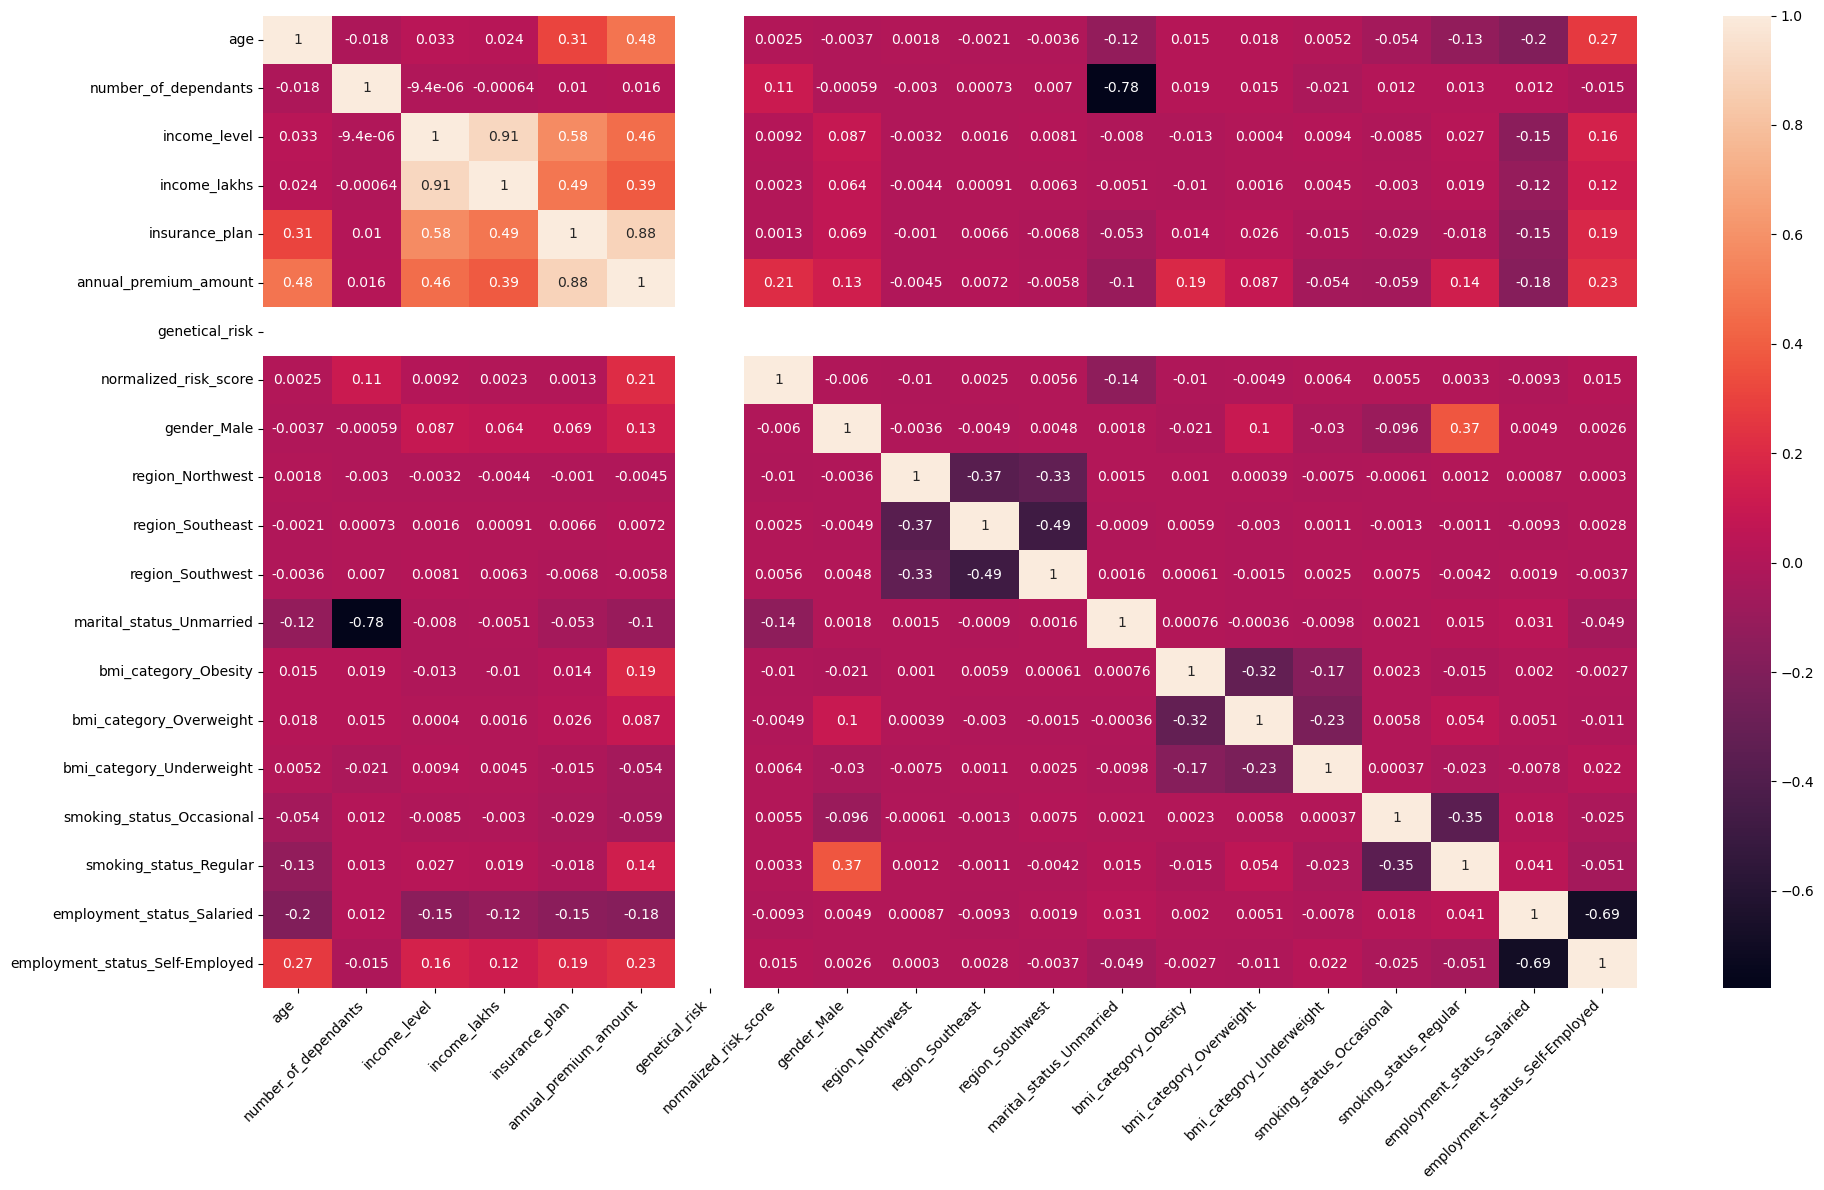

In [254]:
cm = df_4.corr()

plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [255]:
X = df_4.drop('annual_premium_amount', axis='columns')
y = df_4['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['age','number_of_dependants', 'income_level',  'income_lakhs', 'insurance_plan', 'genetical_risk']
scaler = MinMaxScaler()

X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.0,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000
mean,0.371628,0.477547,0.371225,0.224509,0.544112,0.0,0.426373,0.549125,0.200691,0.352693,0.301992,0.253336,0.196835,0.295051,0.110087,0.173228,0.374656,0.466132,0.354269
std,0.240053,0.284129,0.351111,0.226822,0.379009,0.0,0.240084,0.497589,0.400524,0.477816,0.459129,0.434929,0.397613,0.456073,0.313003,0.378450,0.484042,0.498860,0.478299
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173913,0.200000,0.000000,0.060606,0.500000,0.0,0.357143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.347826,0.600000,0.333333,0.161616,0.500000,0.0,0.428571,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.565217,0.600000,0.666667,0.313131,1.000000,0.0,0.428571,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [256]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [257]:
calculate_vif(X)

,Column,VIF
0,age,3.921783
1,number_of_dependants,6.278938
2,income_level,13.890522
3,income_lakhs,11.185596
4,insurance_plan,5.271297
5,genetical_risk,NaN
6,normalized_risk_score,3.810619
7,gender_Male,2.599098
8,region_Northwest,2.123965
9,region_Southeast,2.980842


In [258]:
calculate_vif(X.drop('income_level', axis="columns"))

,Column,VIF
0,age,3.863055
1,number_of_dependants,6.278147
2,income_lakhs,2.678102
3,insurance_plan,4.574625
4,genetical_risk,NaN
5,normalized_risk_score,3.808345
6,gender_Male,2.591439
7,region_Northwest,2.123277
8,region_Southeast,2.979899
9,region_Southwest,2.708641


In [259]:
# we will drop income_lakhs due to high VIF value
X_reduced = X.drop('income_level', axis="columns")

<h2 align="center" style="color:blue">Model Training</h2>

In [260]:
X_reduced.head()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.0,0.050505,0.0,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.065217,0.4,0.050505,0.0,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.500000,0.4,0.191919,0.5,0.0,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.086957,0.6,0.767677,1.0,0.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.652174,0.6,0.131313,0.0,0.0,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


In [261]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.30, random_state=42)

# shape of the X_train, X_test, y_train, y_test features
print('x train: ', X_train.shape)
print('x test: ', X_test.shape)
print('y train: ', y_train.shape)
print('y test: ', y_test.shape)

x train:  (20875, 18)
x test:  (8947, 18)
y train:  (20875,)
y test:  (8947,)


# Linear Regression Model

In [262]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

test_score = model_lr.score(X_test, y_test)
train_score = model_lr.score(X_train, y_train)

print('Test Score: ', test_score)
print('Train Score: ', train_score)

Test Score:  0.9546117251336064
Train Score:  0.9530815646744318


In [263]:
y_pred = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)

print('MSE: ', mse_lr)
print('MAE: ', mae_lr)
print('RMSE: ', rmse_lr)

MSE:  2183801.8818571893
MAE:  1120.208233629365
RMSE:  1477.769224830856


In [264]:
X_test.shape

(8947, 18)

In [265]:
np.set_printoptions(suppress=True, precision=6)
model_lr.coef_

array([ 7014.394967, -1247.793379,  -748.504739, 14840.076324,
           0.      ,  6029.147429,    42.765804,   -76.165657,
         -25.083317,   -53.337792,  -702.171931,  3930.462628,
        1999.074293,   598.455259,   855.180317,  2816.791535,
         -73.460134,   248.754208])

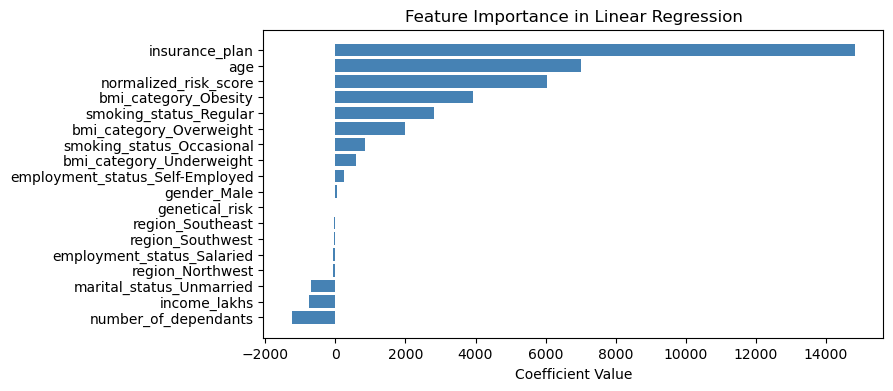

In [266]:
feature_importance = model_lr.coef_

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients'])

# Sort the DataFrame by the absolute value of the coefficients
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression')
plt.show()

### Ridge Regression Model

In [267]:
model_rg = Ridge(alpha=1)
model_rg.fit(X_train, y_train)
test_score = model_rg.score(X_test, y_test)
train_score = model_rg.score(X_train, y_train)
train_score, test_score

(0.9530813964457598, 0.954612316781273)

In [268]:
y_pred = model_rg.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
print("Ridge Regression ==> MSE: ", mse_lr, "RMSE: ", rmse_lr)

Ridge Regression ==> MSE:  2183773.41544617 RMSE:  1477.7595932512738


### XGBoost

In [269]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(n_estimators=20, max_depth=3)
model_xgb.fit(X_train, y_train)
model_xgb.score(X_test, y_test)

0.9950187802314758

In [270]:
y_pred = model_xgb.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
print("XGBoost Regression ==> MSE: ", mse_lr, "RMSE: ", rmse_lr)

XGBoost Regression ==> MSE:  239665.8125 RMSE:  489.5567510513975


In [271]:
model_xgb = XGBRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

random_search = RandomizedSearchCV(model_xgb, param_grid, n_iter=10, cv=3, scoring='r2', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
random_search.best_score_

np.float64(0.9981011946996053)

### LightGBM Model

In [272]:
from lightgbm import LGBMRegressor, LGBMClassifier
model_lgb = LGBMRegressor()
model_lgb.fit(X_train, y_train)
model_lgb.score(X_test, y_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 187
[LightGBM] [Info] Number of data points in the train set: 20875, number of used features: 17
[LightGBM] [Info] Start training from score 20923.203784


0.9980388546636295

In [273]:
random_search.best_params_

{'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}

In [274]:
best_model = random_search.best_estimator_

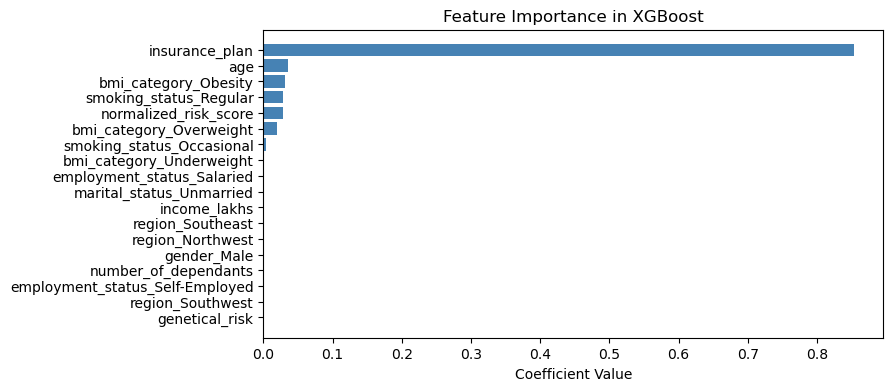

In [275]:
feature_importance = best_model.feature_importances_

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in XGBoost')
plt.show()

# Error Analysis

In [276]:
y_pred = best_model.predict(X_test)
residual = y_pred - y_test

residual_pct = (residual / y_test) * 100

results_df = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred,
    'residual': residual,
    'residual_pct': residual_pct
})

results_df.sample(10)

,actual,predicted,residual,residual_pct
11302,18732,18747.720703,15.720703,0.083924
15604,13304,12954.021484,-349.978516,-2.630626
27983,10834,11091.440430,257.440430,2.376227
22376,18180,17978.451172,-201.548828,-1.108629
28531,32664,33116.207031,452.207031,1.384420
3199,24932,25039.005859,107.005859,0.429191
24208,11370,11169.290039,-200.709961,-1.765259
17708,26218,26568.939453,350.939453,1.338544
24362,30872,30551.736328,-320.263672,-1.037392
10401,31000,30521.460938,-478.539062,-1.543674


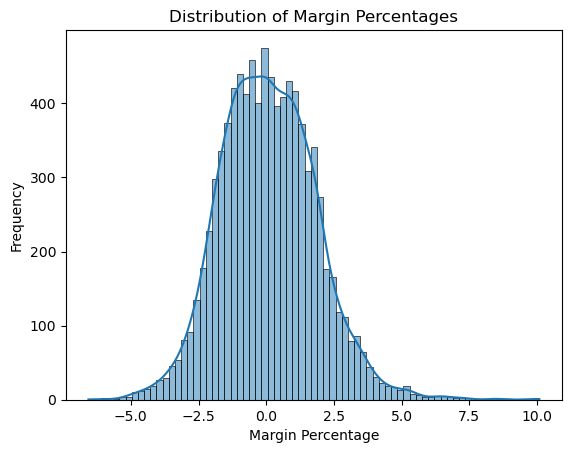

In [277]:
sns.histplot(results_df['residual_pct'], kde=True)
plt.title('Distribution of Margin Percentages')
plt.xlabel('Margin Percentage')
plt.ylabel('Frequency')
plt.show()

In [278]:
# Let's assume we talked to our business owner and we are told that we are only allowed to have margin u until to 10%. Not mroe than that.

# the threshold that is more than 10% will be considered as extreme_error_threshold

extreme_error_threshold = 10

extreme_results_df = results_df[np.abs(results_df['residual_pct']) > 5]
extreme_results_df.sample(30)

,actual,predicted,residual,residual_pct
17811,6569,7200.947754,631.947754,9.620152
29726,10075,10585.199219,510.199219,5.064012
16378,9563,10064.500000,501.500000,5.244170
10020,10639,11205.873047,566.873047,5.328255
24351,11554,12147.770508,593.770508,5.139090
12005,6765,7197.151367,432.151367,6.388047
11189,8563,9109.734375,546.734375,6.384846
29457,9067,9542.262695,475.262695,5.241675
29165,8547,9113.093750,566.093750,6.623303
26347,8659,9113.093750,454.093750,5.244182


In [279]:
extreme_results_df.shape

(83, 4)

In [280]:
extreme_errors_percentage = extreme_results_df.shape[0]*100 / X_test.shape[0]
extreme_errors_percentage

0.9276852576282553

In [281]:
X_test.shape

(8947, 18)

We have 30% extreme errors which means for 30% customers we will either overcharge or undercharge by 10% or more

In [282]:
# Let's be even more offensive and see how many percetange of the customers going to be overcharged or undercharged more than 50%
extreme_results_df[abs(extreme_results_df['residual_pct']) > 50].sort_values('residual_pct', ascending=False)

,actual,predicted,residual,residual_pct


There will be more than 500 customers whom we will overcharge or undercharge by more than 50%

In [283]:
extreme_errors_df = X_test.loc[extreme_results_df.index]
extreme_errors_df.head(2)

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
22253,0.217391,0.6,0.070707,0.0,0.0,0.357143,0,0,1,0,0,0,0,0,0,0,1,0
9243,0.413043,0.0,0.010101,0.0,0.0,0.357143,0,1,0,0,1,0,0,0,1,0,1,0


In [284]:
X_test.columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
       'genetical_risk', 'normalized_risk_score', 'gender_Male',
       'region_Northwest', 'region_Southeast', 'region_Southwest',
       'marital_status_Unmarried', 'bmi_category_Obesity',
       'bmi_category_Overweight', 'bmi_category_Underweight',
       'smoking_status_Occasional', 'smoking_status_Regular',
       'employment_status_Salaried', 'employment_status_Self-Employed'],
      dtype='object')

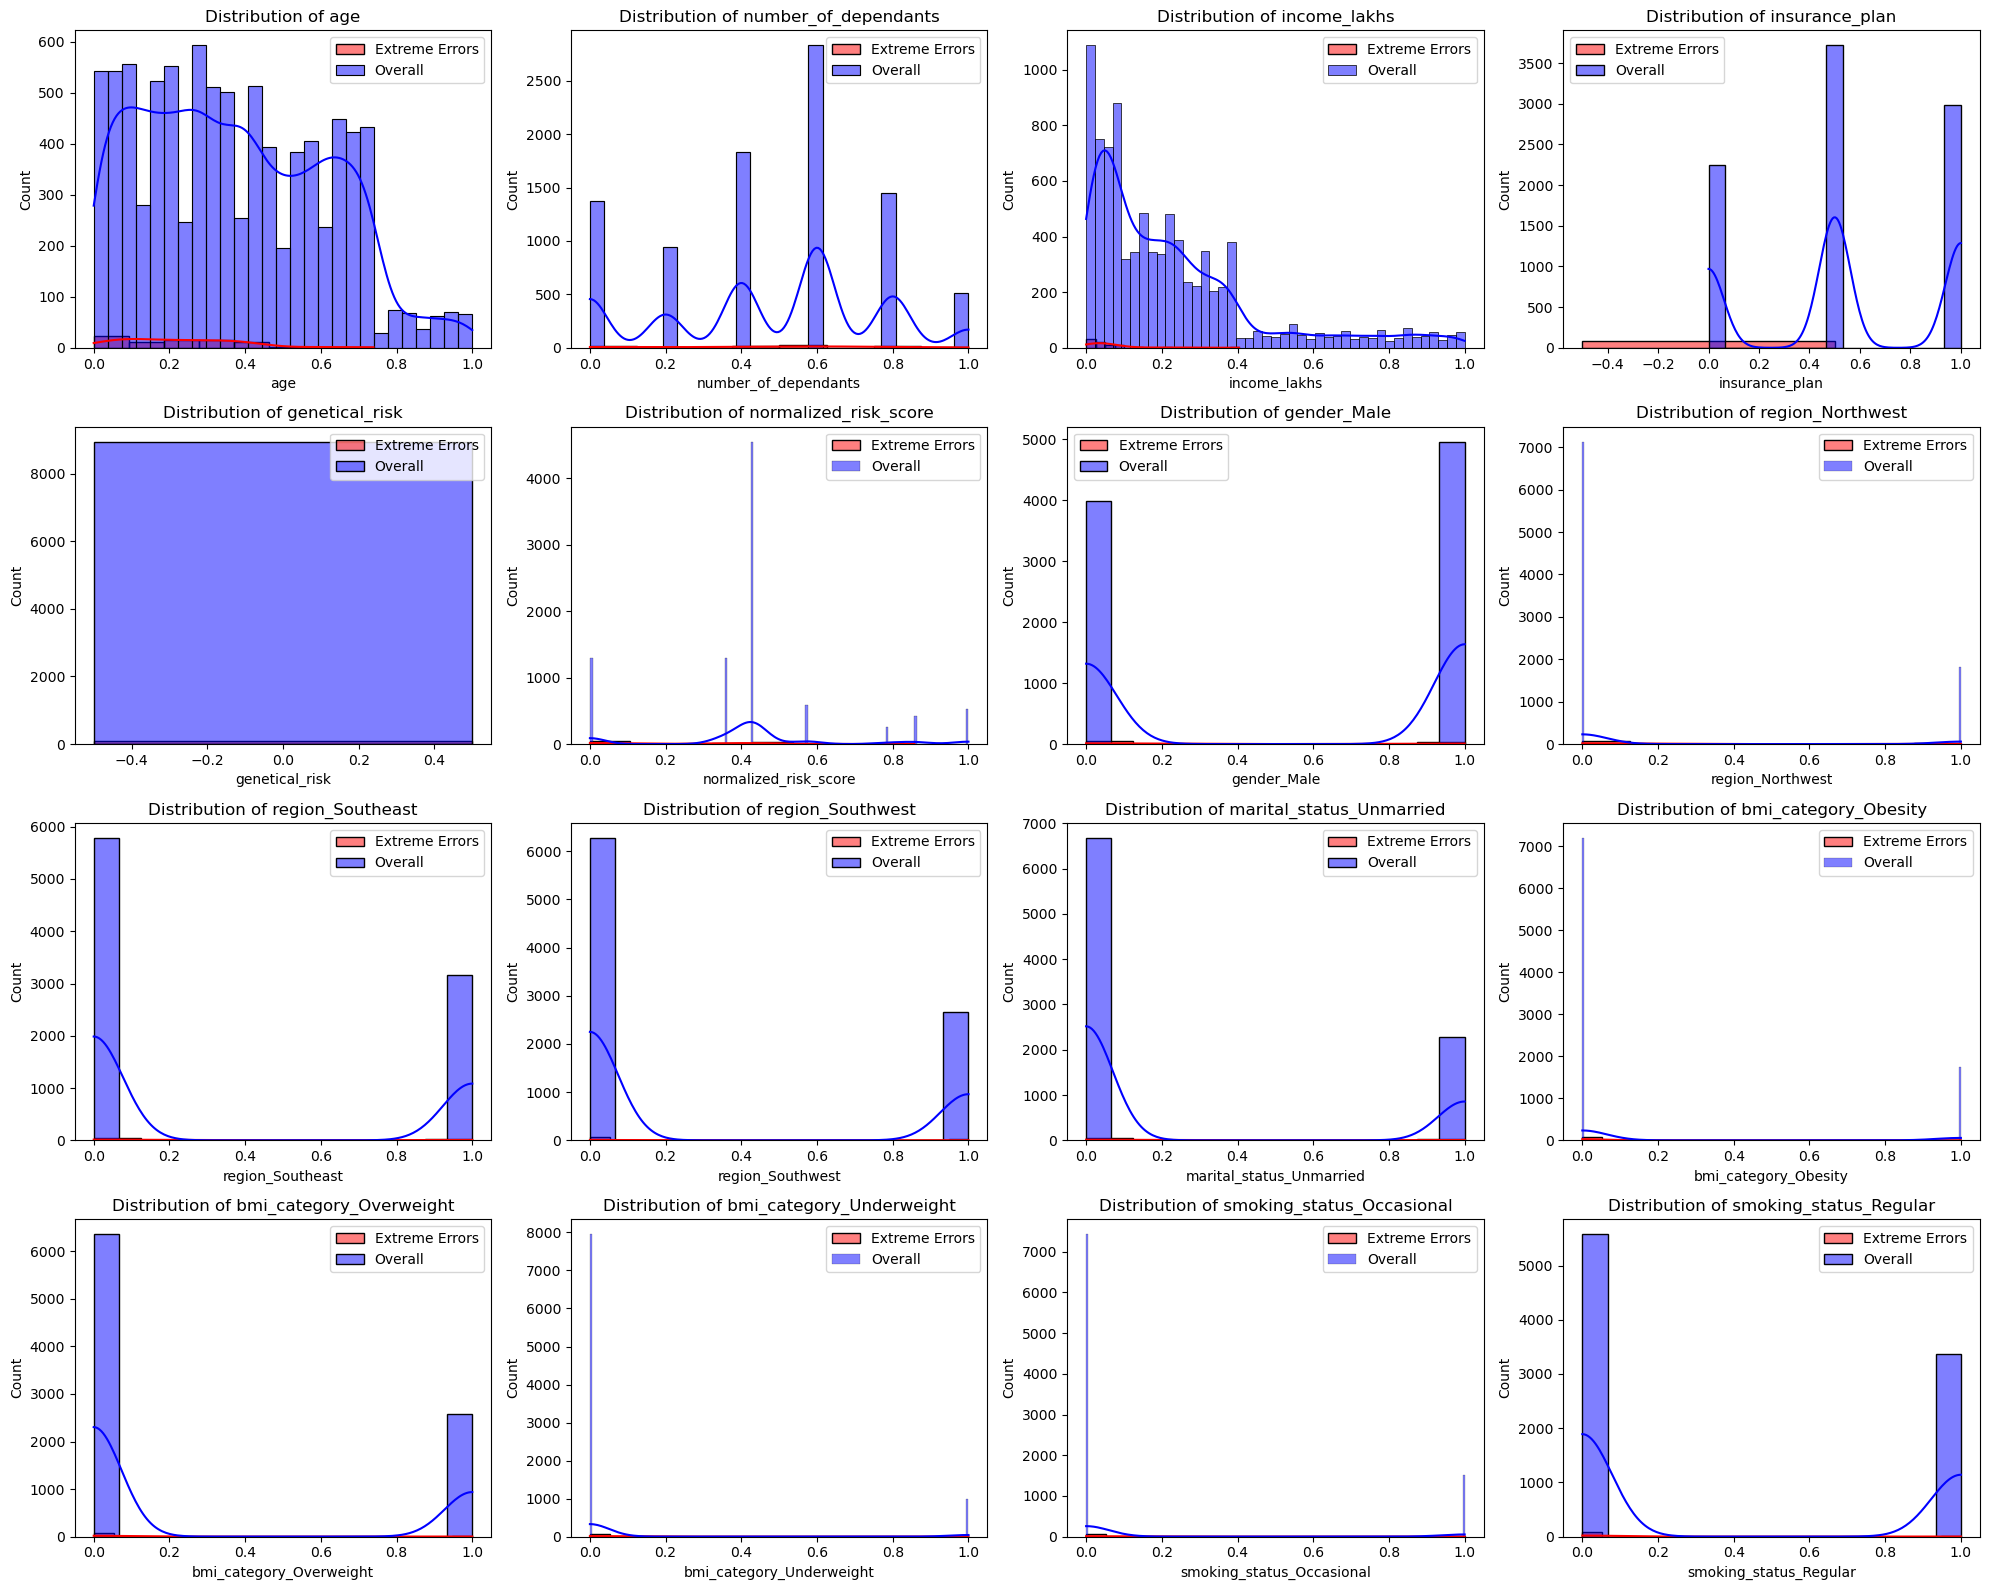

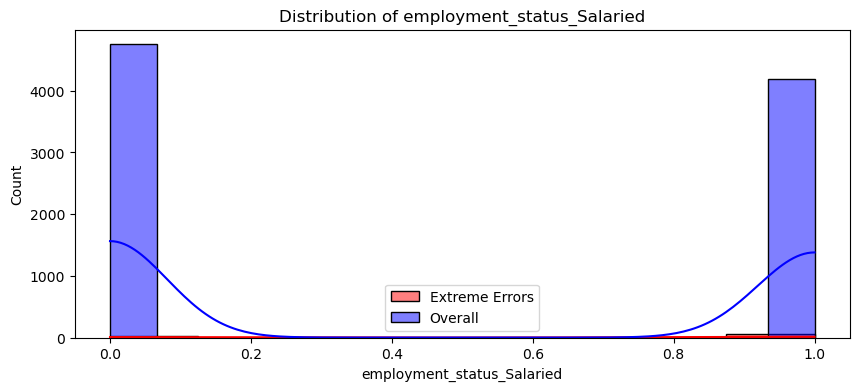

In [285]:
# First 16 graphs in 4x4
fig, axes = plt.subplots(4, 4, figsize=(20, 16))
axes = axes.flatten()

for idx, feature in enumerate(X_test.columns[:16]):
    ax = axes[idx]
    sns.histplot(extreme_errors_df[feature], color='red', label='Extreme Errors', kde=True, ax=ax)
    sns.histplot(X_test[feature], color='blue', label='Overall', alpha=0.5, kde=True, ax=ax)
    ax.legend()
    ax.set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

# 17th graph separately
plt.figure(figsize=(10, 4))
feature = X_test.columns[16]
sns.histplot(extreme_errors_df[feature], color='red', label='Extreme Errors', kde=True)
sns.histplot(X_test[feature], color='blue', label='Overall', alpha=0.5, kde=True)
plt.legend()
plt.title(f'Distribution of {feature}')
plt.show()

In [286]:
extreme_errors_df['income_level'] = -1

In [287]:
df_reversed = pd.DataFrame()
df_reversed[cols_to_scale] = scaler.inverse_transform(extreme_errors_df[cols_to_scale])
df_reversed.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk
0,36.0,3.0,-2.0,8.0,1.0,0.0
1,45.0,0.0,-2.0,2.0,1.0,0.0
2,29.0,3.0,-2.0,3.0,1.0,0.0
3,34.0,2.0,-2.0,5.0,1.0,0.0
4,44.0,3.0,-2.0,7.0,1.0,0.0


In [288]:
df_reversed.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk
count,83.000000,83.000000,83.0,83.000000,83.0,83.0
mean,36.698795,2.289157,-2.0,7.481928,1.0,0.0
std,7.369573,1.526435,0.0,7.980711,0.0,0.0
min,26.000000,0.000000,-2.0,1.000000,1.0,0.0
25%,30.000000,1.000000,-2.0,3.000000,1.0,0.0
50%,36.000000,3.000000,-2.0,5.000000,1.0,0.0
75%,41.500000,3.000000,-2.0,8.500000,1.0,0.0
max,60.000000,5.000000,-2.0,41.000000,1.0,0.0


<Axes: xlabel='age', ylabel='Count'>

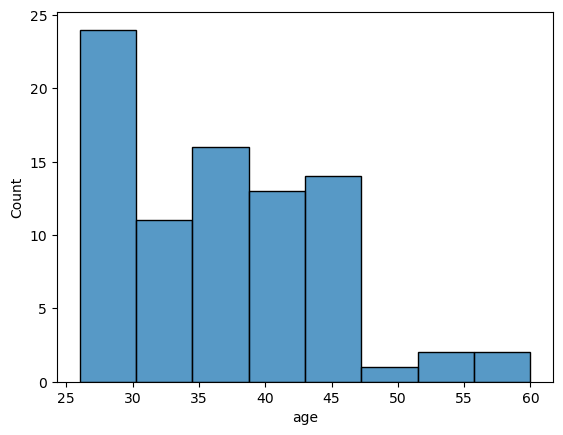

In [289]:
sns.histplot(df_reversed.age)

This shows that majority of the extreme errors are coming from young age group (i.e. <25 years of age). We need to may be build a separate model for this segment

In [290]:
df_reversed['age'].quantile(0.999)

np.float64(59.75400000000002)

In [291]:
# from joblib import dump

In [332]:
cols_to_scale

['age',
 'number_of_dependants',
 'income_level',
 'income_lakhs',
 'insurance_plan',
 'genetical_risk']

In [333]:
dump(best_model, 'artifacts/model_rest_ger.joblib')
scaler_with_cols = {
    'scaler': scaler,
    'cols_to_scaler': cols_to_scale
}
dump(scaler_with_cols, 'artifacts/scaler_rest_ger.joblib')

['artifacts/scaler_rest_ger.joblib']

In [293]:
# cols_to_scale

In [294]:
# extreme_errors_percentage

In [295]:
X_test.shape

(8947, 18)

In [296]:
X_test.head(1)

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
5495,0.021739,0.8,0.838384,1.0,0.0,0.785714,1,0,0,1,0,1,0,0,0,1,1,0


In [297]:
cols_to_scale

['age',
 'number_of_dependants',
 'income_level',
 'income_lakhs',
 'insurance_plan',
 'genetical_risk']

In [298]:
X_test

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
5495,0.021739,0.8,0.838384,1.0,0.0,0.785714,1,0,0,1,0,1,0,0,0,1,1,0
582,0.695652,0.8,0.000000,0.5,0.0,1.000000,0,0,1,0,0,1,0,0,0,0,0,1
281,0.195652,0.8,0.252525,0.5,0.0,0.428571,0,0,1,0,0,0,1,0,0,0,1,0
15443,0.152174,0.0,0.252525,0.5,0.0,0.428571,0,0,1,0,1,0,0,1,0,1,0,1
24281,0.695652,1.0,0.282828,1.0,0.0,0.357143,0,0,1,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12305,0.565217,0.8,0.909091,1.0,0.0,0.428571,1,0,0,1,0,1,0,0,0,1,0,1
2117,0.326087,0.8,0.060606,1.0,0.0,0.000000,1,0,0,0,0,0,1,0,0,1,1,0
23521,0.586957,0.8,0.929293,1.0,0.0,1.000000,1,0,1,0,0,0,0,0,1,0,0,1
29683,0.021739,0.4,0.030303,0.0,0.0,0.428571,0,0,1,0,0,0,0,1,1,0,0,1
